In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


dataset = pd.read_csv(r'C:\Users\GAMING\AIML Project\2025-Y2-S1-MLB-B6G1-05-PGNO-105\data\heart_disease_risk.csv')

print(dataset,dataset.shape)


       Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0             0.0                  0.0      0.0           1.0        0.0   
1             0.0                  1.0      0.0           1.0        0.0   
2             1.0                  0.0      0.0           1.0        0.0   
3             1.0                  1.0      0.0           1.0        0.0   
4             0.0                  0.0      1.0           0.0        1.0   
...           ...                  ...      ...           ...        ...   
69995         0.0                  0.0      1.0           0.0        0.0   
69996         1.0                  1.0      1.0           0.0        1.0   
69997         0.0                  0.0      0.0           0.0        0.0   
69998         1.0                  1.0      0.0           1.0        1.0   
69999         1.0                  1.0      1.0           1.0        1.0   

       Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0           0.0    

In [17]:
# Separate features and label
label_col = 'Heart_Risk'
features = dataset.drop(columns=[label_col])

In [18]:
features.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.499229,0.500586,0.498571,0.498729,0.501414,0.498929,0.501500,0.502457,0.497429,0.499214,0.500643,0.502971,0.499157,0.503543,0.497629,0.499957,0.548929,54.461986
std,0.500003,0.500003,0.500002,0.500002,0.500002,0.500002,0.500001,0.499998,0.499997,0.500003,0.500003,0.499995,0.500003,0.499991,0.499998,0.500004,0.497604,16.410794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000


In [19]:
#Identify numerical (non-binary) features 
continuous_cols = [col for col in features.columns 
                   if dataset[col].nunique() > 2 and np.issubdtype(dataset[col].dtype, np.number)]
print(f"Continuous columns detected: {continuous_cols}")



Continuous columns detected: ['Age']


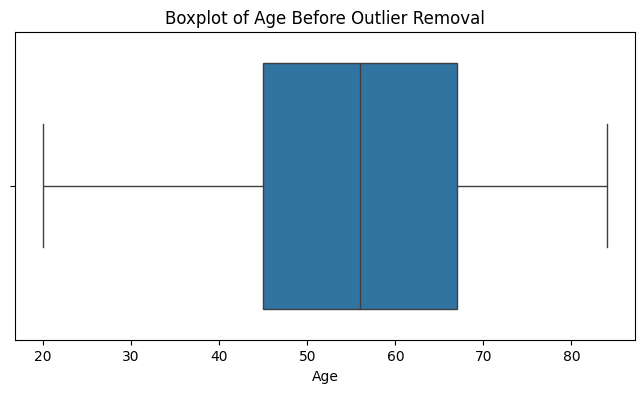

In [20]:
#Visualization Before Removal
plt.figure(figsize=(8,4))
sns.boxplot(x=dataset['Age'])
plt.title("Boxplot of Age Before Outlier Removal")
plt.show()


In [21]:
#IQR Method 
Q1 = dataset[continuous_cols].quantile(0.25)
Q3 = dataset[continuous_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower bound : ',lower_bound)
print('Upper bound : ',upper_bound)

Lower bound :  Age    12.0
dtype: float64
Upper bound :  Age    100.0
dtype: float64


In [22]:
#Filter the data
dataset_clean = dataset[~((dataset[continuous_cols] < lower_bound) | (dataset[continuous_cols] > upper_bound)).any(axis=1)]

In [23]:
print(f"Original shape: {dataset.shape}")
print(f"After outlier removal: {dataset_clean.shape}")


Original shape: (70000, 19)
After outlier removal: (70000, 19)


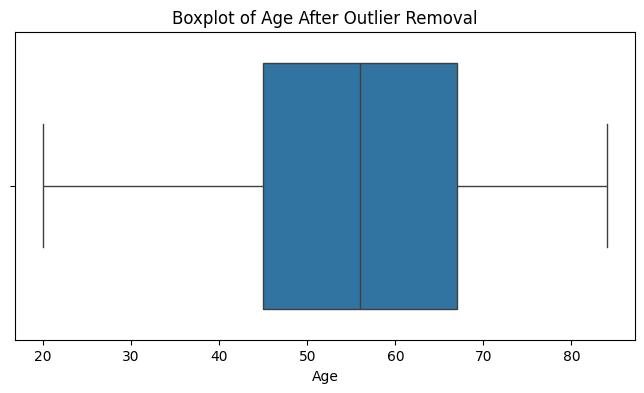

In [24]:
#Visualize cleaned data
plt.figure(figsize=(8,4))
sns.boxplot(x=dataset_clean['Age'])
plt.title("Boxplot of Age After Outlier Removal")
plt.show()

In [25]:
dataset_clean.to_csv("heart_disease_risk_cleaned_IQR.csv", index=False)